<a href="https://colab.research.google.com/github/Srahaman33/comodity-price-predictor/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
import pandas as pd
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pickle

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Define the base path to the dataset
base_path = '/content/drive/MyDrive/Dataset/sih_dataset'
# Ensure the SARIMA models directory exists
os.makedirs('/content/drive/MyDrive/sarima_models', exist_ok=True)

In [15]:
# Define a function to retrieve the file path for a given commodity and zone
def get_file_path(commodity, zone):
    commodity_folder = {
        'groundnut': 'oils/groundnut',
        'mustard': 'oils/mustard',
        'palm': 'oils/palm',
        'soya': 'oils/soya',
        'sunflower': 'oils/sunflower',
        'vanaspati': 'oils/vanaspati',
        'wheat': 'grains/wheat',
        'atta': 'grains/atta',
        'rice': 'grains/rice',
        'gram': 'pulses/gram',
        'masoor': 'pulses/masoor',
        'moong': 'pulses/moong',
        'tur': 'pulses/tur',
        'urad': 'pulses/urad',
        'onion': 'vegetables/onion',
        'potato': 'vegetables/potato',
        'tomato': 'vegetables/tomato',
        'gur': 'others/gur',
        'milk': 'others/milk',
        'salt': 'others/salt',
        'sugar': 'others/sugar',
        'tea': 'others/tea'
    }
    file_name = f"{commodity}_{zone}.csv"
    file_path = os.path.join(base_path, commodity_folder[commodity], file_name)
    return file_path


In [16]:
# Function to load and preprocess data
def load_and_prepare_data(commodity, zone):
    file_path = get_file_path(commodity, zone)
    df = pd.read_csv(file_path)

    # Ensure date is parsed correctly and drop any rows with invalid/missing dates
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['date', 'value'], inplace=True)

    # Sort by date
    df.sort_values('date', inplace=True)

    # Set date as index and infer frequency
    df.set_index('date', inplace=True)

    # Set a regular date frequency (daily, monthly) if possible
    df = df.asfreq('D')

    return df


In [17]:
# Function to train SARIMA model
def train_sarima_model(commodity, zone):
    df = load_and_prepare_data(commodity, zone)

    # Train SARIMA model (p, d, q, P, D, Q, s are manually tuned or can be tuned via grid search)
    sarima_model = sm.tsa.SARIMAX(df['value'],
                                  order=(1, 1, 1),
                                  seasonal_order=(1, 1, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
    sarima_result = sarima_model.fit(disp=False)

    # Forecast for the next 3 months (90 days)
    forecast = sarima_result.get_forecast(steps=90)
    forecast_df = forecast.summary_frame()

    # Store the forecasted result for future retrieval
    with open(f'/content/drive/MyDrive/sarima_models/{commodity}_{zone}_forecast.pkl', 'wb') as f:
        pickle.dump(forecast_df, f)

    return sarima_result, forecast_df


In [18]:
# Function to forecast prices for all commodities and zones
def train_and_save_all_models():
    commodities = ['groundnut', 'mustard', 'palm', 'soya', 'sunflower', 'vanaspati',
                   'wheat', 'atta', 'rice', 'gram', 'masoor', 'moong', 'tur', 'urad',
                   'onion', 'potato', 'tomato', 'gur', 'milk', 'salt', 'sugar', 'tea']

    zones = ['east', 'northeast', 'north', 'south', 'west']

    # Loop through each commodity and zone to train models
    for commodity in commodities:
        for zone in zones:
            print(f"Training SARIMA for {commodity} in {zone} zone...")
            try:
                train_sarima_model(commodity, zone)
            except Exception as e:

                print(f"Error training {commodity} in {zone}: {e}")


In [19]:
# Function to load and display forecast based on user input
def load_forecast(commodity, zone):
    try:
        with open(f'/content/drive/MyDrive/sarima_models/{commodity}_{zone}_forecast.pkl', 'rb') as f:
            forecast_df = pickle.load(f)
        return forecast_df
    except FileNotFoundError:
        return f"No forecast found for {commodity} in {zone}"

In [20]:
# Train and store models for all commodities and zones
train_and_save_all_models()

Training SARIMA for groundnut in east zone...
Training SARIMA for groundnut in northeast zone...
Training SARIMA for groundnut in north zone...
Training SARIMA for groundnut in south zone...
Training SARIMA for groundnut in west zone...
Training SARIMA for mustard in east zone...
Training SARIMA for mustard in northeast zone...
Training SARIMA for mustard in north zone...
Training SARIMA for mustard in south zone...
Training SARIMA for mustard in west zone...
Training SARIMA for palm in east zone...
Training SARIMA for palm in northeast zone...
Training SARIMA for palm in north zone...
Training SARIMA for palm in south zone...
Training SARIMA for palm in west zone...
Training SARIMA for soya in east zone...
Training SARIMA for soya in northeast zone...
Training SARIMA for soya in north zone...
Training SARIMA for soya in south zone...
Training SARIMA for soya in west zone...
Training SARIMA for sunflower in east zone...
Training SARIMA for sunflower in northeast zone...
Training SARIMA

tea
northeast
Forecasted average prices for the next 3 months:
value             mean  mean_ci_lower  mean_ci_upper     average
2024-09-03  317.214280     275.030600     359.397960  317.214280
2024-09-04  317.657782     274.200399     361.115165  317.657782
2024-09-05  318.555760     274.759778     362.351743  318.555760
2024-09-06  318.621810     274.578380     362.665240  318.621810
2024-09-07  317.397378     273.123466     361.671291  317.397378
...                ...            ...            ...         ...
2024-11-27  320.826330     262.764575     378.888085  320.826330
2024-11-28  321.309724     263.095601     379.523847  321.309724
2024-11-29  321.265934     262.898867     379.633001  321.265934
2024-11-30  320.688012     262.169788     379.206237  320.688012
2024-12-01  320.614185     261.940325     379.288044  320.614185

[90 rows x 4 columns]


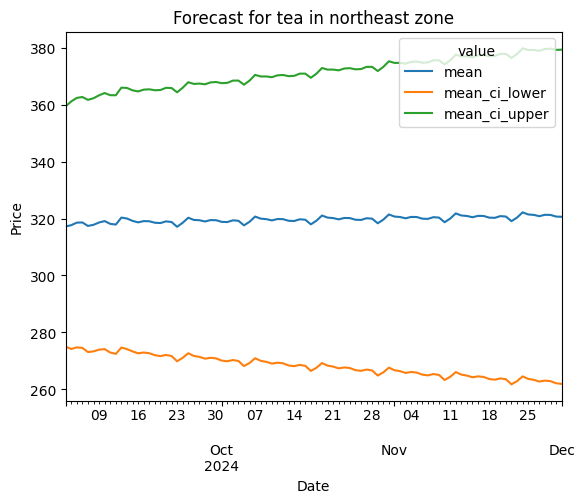

In [22]:
# Based on user input, retrieve forecast for a specific commodity and zone
commodity_input = input()
zone_input = input()

# Load and display forecast for the selected commodity and zone
forecast_result = load_forecast(commodity_input, zone_input)

if isinstance(forecast_result, pd.DataFrame):
    # Print forecasted values for the next 3 months
    forecast_result['average'] = (forecast_result['mean'] + forecast_result['mean_ci_lower'] + forecast_result['mean_ci_upper']) / 3
    print("Forecasted average prices for the next 3 months:")
    print(forecast_result[['mean', 'mean_ci_lower', 'mean_ci_upper', 'average']].head(90))  # Display first 90 days forecast

    # Plot forecast
    forecast_result[['mean', 'mean_ci_lower', 'mean_ci_upper']].plot()
    plt.title(f'Forecast for {commodity_input} in {zone_input} zone')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()
else:
    print(forecast_result)

In [ ]:
n